In [1]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
instance_type='ml.m4.xlarge'

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.


In [2]:
conda install -c conda-forge numexpr>=2.8.4




==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



Note: you may need to restart the kernel to use updated packages.


In [3]:
$ conda update -n base -c conda-forge conda

SyntaxError: invalid syntax (3835070025.py, line 1)

In [4]:
conda update -n base -c conda-forge conda

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-25.9.1               |  py312h7900ff3_0         1.2 MB  conda-forge
    conda-libmamba-solver-25.4.0|     pyhd8ed1ab_0          41 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  certifi            conda-forge/noarch::certifi-2025.10.5-pyhd8ed1ab_0 
  packaging          conda-forge/noarch::packaging-25.0-pyh29332c3_1 
  reques

In [5]:
zip_files = [str(file) for file in list(Path(base_path).iterdir()) if '.zip' in str(file)]len(zip_files)

NameError: name 'base_path' is not defined

In [6]:
import os
print(os.getcwd())


/home/ec2-user/SageMaker/en_us


In [8]:
zip_files = [str(file) for file in list(Path(base_path).iterdir()) if '.zip' in str(file)]
len(zip_files)

0

In [10]:
# download the files

zip_path = '/home/ec2-user/SageMaker/project/data/FlightDelays/'
base_path = '/home/ec2-user/SageMaker/project/data/FlightDelays/'
csv_base_path = '/home/ec2-user/SageMaker/project/data/csvFlightDelays/'

!mkdir -p {zip_path}
!mkdir -p {csv_base_path}
!aws s3 cp s3://aws-tc-largeobjects/CUR-TF-200-ACMLFO-1/flight_delay_project/data/ {zip_path} --recursive

download: s3://aws-tc-largeobjects/CUR-TF-200-ACMLFO-1/flight_delay_project/data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip to ../project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip
download: s3://aws-tc-largeobjects/CUR-TF-200-ACMLFO-1/flight_delay_project/data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip to ../project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip
download: s3://aws-tc-largeobjects/CUR-TF-200-ACMLFO-1/flight_delay_project/data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip to ../project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip
download: s3://aws-tc-largeobjects/CUR-TF-200-ACMLFO-1/flight_delay_project/data/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip to ../project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_pre

In [11]:
zip_files = [str(file) for file in list(Path(base_path).iterdir()) if '.zip' in str(file)]
len(zip_files)

60

In [12]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting /home/ec2-user/SageMaker/project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting /home/ec2-user/SageMaker/project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2017_5.zip 
Extracting /home/ec2-user/SageMaker/project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2015_6.zip 
Extracting /home/ec2-user/SageMaker/project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting /home/ec2-user/SageMaker/project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip 
Extracting /home/ec2-user/SageMaker/project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2015_1.zip 
Extracting /home/ec2-user/SageMaker/project/data/FlightDelays/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip 
Extracting /home/ec2-user/SageMaker/project/data/FlightDelays/On_Tim

In [13]:
csv_files = [str(file) for file in list(Path(csv_base_path).iterdir()) if '.csv' in str(file)]
len(csv_files)

60

In [14]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

In [15]:
import os
print(os.getcwd())

/home/ec2-user/SageMaker/en_us


In [16]:
pandas.read_csv(/home/ec2-user/SageMaker/en_us, *, sep=',', delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=<no_default>, skip_blank_lines=True, parse_dates=None, infer_datetime_format=<no_default>, keep_date_col=<no_default>, date_parser=<no_default>, date_format=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors='strict', dialect=None, on_bad_lines='error', delim_whitespace=<no_default>, low_memory=True, memory_map=False, float_precision=None, storage_options=None, dtype_backend=<no_default>)[source]


SyntaxError: invalid syntax (381214033.py, line 1)

In [17]:
df_temp = pd.read_csv(f"{csv_base_path}On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")

In [18]:
df_shape = df_temp.shape
print(f'Rows and columns in one CSV file is {df_shape}')

Rows and columns in one CSV file is (585749, 110)


In [19]:
# Print the first 10 rows
print("\nFirst 10 rows of the dataset:")
print(df_temp.head(10))


First 10 rows of the dataset:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0           

In [20]:
# Print all column names
print("\nThe column names are:")
print("##########")
for col in df_temp.columns:
    print(col)


The column names are:
##########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div

In [21]:
del_cols = [col for col in df_temp.columns if 'Del' in col]
print(f'\nColumns containing "Del": {len(del_cols)}')
print(del_cols)



Columns containing "Del": 14
['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


In [22]:
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])
print("The years in this dataset are: ", df_temp['Year'].unique())
print("The months covered in this dataset are: ", df_temp['Month'].unique())
print("The date range for data is :", df_temp['FlightDate'].min(), " to ", df_temp['FlightDate'].max())
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))


The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

In [23]:
counts = pd.DataFrame({
    'Origin': df_temp['Origin'].value_counts(),
    'Destination': df_temp['Dest'].value_counts()
})
counts


,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


In [24]:
counts.sort_values(by='Origin', ascending=False).head(15)


,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


In [25]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):

    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """

    df = pd.DataFrame()
    
    for file in csv_files:
        df_temp = pd.read_csv(file)
        df_temp = df_temp[filter_cols]
        for col, val in zip(subset_cols,subset_vals):
            df_temp = df_temp[df_temp[col].isin(val)]      
        
        df = pd.concat([df, df_temp], axis=0)
      
    df.to_csv(file_name, index=False)
    print(f'Combined csv stored at {file_name}')

In [26]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

In [27]:
start = time.time()
combined_csv_filename = f"{base_path}combined_files.csv"
combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)
print(f'CSVs merged in {round((time.time() - start)/60,2)} minutes')

Combined csv stored at /home/ec2-user/SageMaker/project/data/FlightDelays/combined_files.csv
CSVs merged in 4.85 minutes


In [28]:
data = pd.read_csv(combined_csv_filename)

In [29]:
df_temp = head(5)

NameError: name 'head' is not defined

In [ ]:
df_shape = df_temp.shape
print(f'Rows and columns in one CSV file is {df_shape}')

In [30]:
import pandas as pd

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine multiple CSV files into one DataFrame with optional filtering.
    
    Parameters:
    ----------
    csv_files : list
        List of CSV file paths to combine.
    filter_cols : list
        List of columns to retain from each CSV.
    subset_cols : list
        List of columns to apply filters on.
    subset_vals : list of lists
        Each list contains the allowed values for the corresponding column in subset_cols.
    file_name : str
        Output file path for the combined CSV.
    """
    
    combined = []  # collect dataframes in a list (faster than repeated concat)
    
    for file in csv_files:
        try:
            df_temp = pd.read_csv(file, usecols=filter_cols)  # only load needed columns
        except ValueError:
            print(f"Warning: Some columns in {file} not found in filter_cols — skipping missing ones.")
            df_temp = pd.read_csv(file)
            df_temp = df_temp[[col for col in filter_cols if col in df_temp.columns]]
        
        # Apply filters
        for col, val in zip(subset_cols, subset_vals):
            if col in df_temp.columns:
                df_temp = df_temp[df_temp[col].isin(val)]
        
        combined.append(df_temp)
    
    # Merge all filtered DataFrames
    df_final = pd.concat(combined, axis=0, ignore_index=True)
    df_final.to_csv(file_name, index=False)
    print(f'✅ Combined CSV stored at: {file_name}')
    
    return df_final


In [31]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

In [32]:
start = time.time()
combined_csv_filename = f"{base_path}combined_files.csv"
combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)
print(f'CSVs merged in {round((time.time() - start)/60,2)} minutes')

✅ Combined CSV stored at: /home/ec2-user/SageMaker/project/data/FlightDelays/combined_files.csv
CSVs merged in 2.51 minutes


In [42]:
data = pd.read_csv(combined_csv_filename)

In [44]:
df_shape = data.shape
print(f'Rows and columns in one CSV file is {df_shape}')

Rows and columns in one CSV file is (1658130, 20)


In [45]:
df_shape = data.head(5)

In [47]:
# Print the first 10 rows
print("\nFirst 10 rows of the dataset:")
print(df_shape.head(10))


First 10 rows of the dataset:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      7          29          7  2018-07-29                WN   
1  2018        3      7          29          7  2018-07-29                WN   
2  2018        3      7          29          7  2018-07-29                WN   
3  2018        3      7          29          7  2018-07-29                WN   
4  2018        3      7          29          7  2018-07-29                WN   

  Origin OriginState Dest DestState  CRSDepTime  ArrDelay  ArrDelayMinutes  \
0    DEN          CO  SFO        CA        1400      15.0             15.0   
1    DEN          CO  SFO        CA         910      -5.0              0.0   
2    DEN          CO  SFO        CA        2250      27.0             27.0   
3    LAX          CA  ATL        GA        1405      -9.0              0.0   
4    LAX          CA  ATL        GA         745       1.0              1.0   

   ArrDel15  Cancel

In [51]:
df_shape = data.shape
df_head = data.head(10)   # first 10 rows


In [52]:
print(f'Rows and columns in one CSV file: {df_shape}')
print("\nFirst 10 rows of the dataset: ")
print(df_head)


Rows and columns in one CSV file: (1658130, 20)

First 10 rows of the dataset: 
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      7          29          7  2018-07-29                WN   
1  2018        3      7          29          7  2018-07-29                WN   
2  2018        3      7          29          7  2018-07-29                WN   
3  2018        3      7          29          7  2018-07-29                WN   
4  2018        3      7          29          7  2018-07-29                WN   
5  2018        3      7          29          7  2018-07-29                WN   
6  2018        3      7          29          7  2018-07-29                WN   
7  2018        3      7          29          7  2018-07-29                WN   
8  2018        3      7          29          7  2018-07-29                WN   
9  2018        3      7          29          7  2018-07-29                WN   

  Origin OriginState Dest DestState  CR

In [53]:
import pandas as pd
data = pd.read_csv("/home/ec2-user/SageMaker/project/data/FlightDelays/combined_files.csv")


In [54]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)


In [55]:
print(data.isnull().sum())


Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
Cancelled                0
Diverted                 0
AirTime              22540
Distance                 0
DistanceGroup            0
dtype: int64


In [56]:
print("Rows and columns: ", data.shape)
print("Years in dataset: ", list(data['Year'].unique()))
print("Months: ", sorted(list(data['Month'].unique())))
data['FlightDate'] = pd.to_datetime(data['FlightDate'])
print("Date range: ", data['FlightDate'].min(), " to ", data['FlightDate'].max())
print("Airlines: ", list(data['Reporting_Airline'].unique()))
print("Origin airports: ", list(data['Origin'].unique()))
print("Destination airports: ", list(data['Dest'].unique()))


Rows and columns:  (1658130, 20)
Years in dataset:  [2018, 2016, 2017, 2014, 2015]
Months:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Date range:  2014-01-01 00:00:00  to  2018-12-31 00:00:00
Airlines:  ['WN', 'AA', 'DL', 'UA', 'OO']
Origin airports:  ['DEN', 'LAX', 'PHX', 'SFO', 'ATL', 'DFW', 'CLT', 'ORD', 'IAH']
Destination airports:  ['SFO', 'ATL', 'DEN', 'PHX', 'LAX', 'DFW', 'CLT', 'ORD', 'IAH']


In [57]:
### Remove null columns
data = data[~data.is_delay.isnull()]
data.isnull().sum(axis = 0)

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
Cancelled            0
Diverted             0
AirTime              0
Distance             0
DistanceGroup        0
dtype: int64

In [58]:
data['DepHourofDay'] = (data['CRSDepTime']//100)

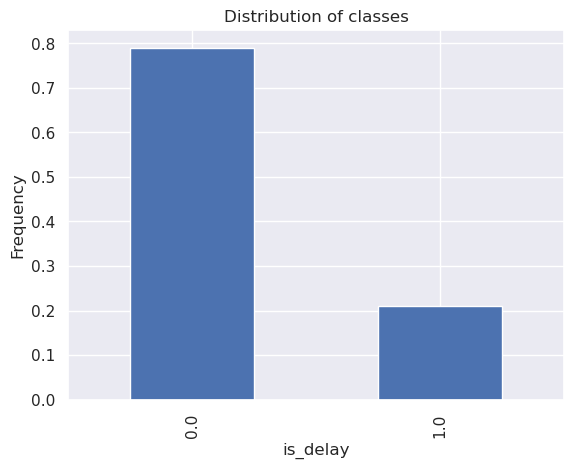

In [59]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

In [60]:
data['DepHourofDay'] = (data['CRSDepTime']//100)

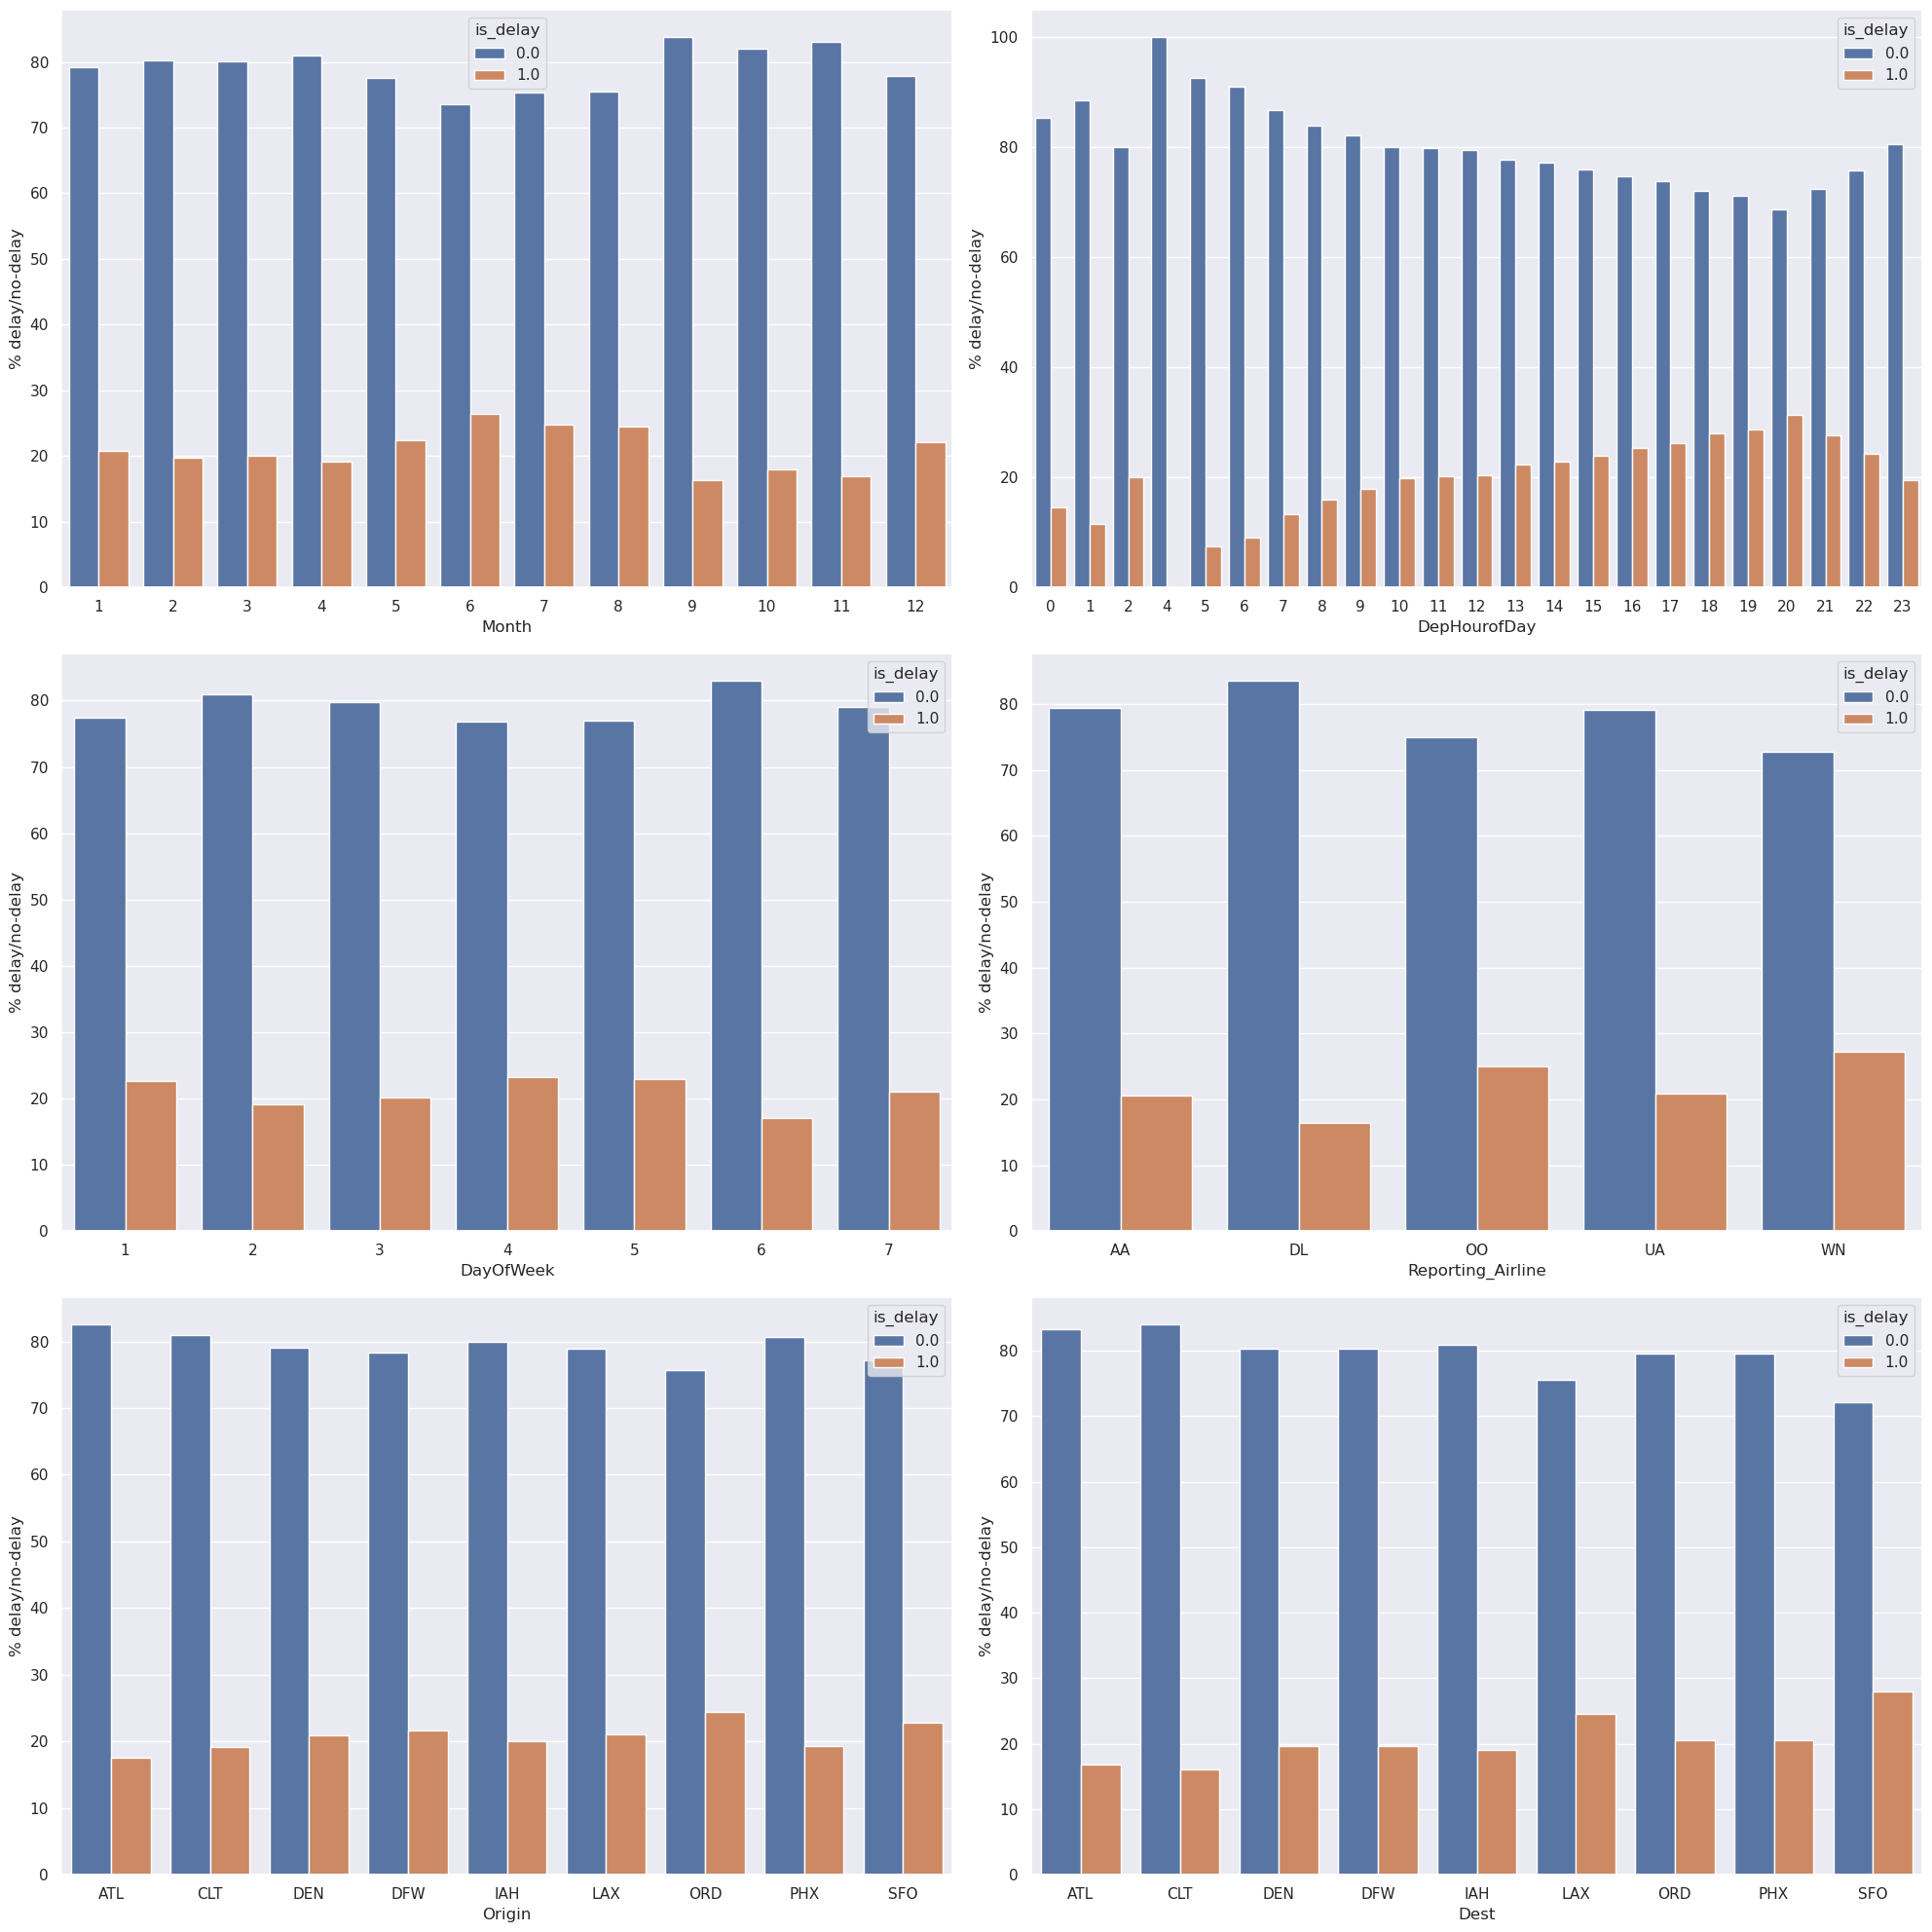

In [61]:
import seaborn as sns

viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']

fig, axes = plt.subplots(3, 2, figsize=(20, 20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    
    # Compute % delay vs no-delay for this column
    temp = (data.groupby(column)['is_delay']
                .value_counts(normalize=True)
                .rename('percentage')
                .mul(100)
                .reset_index()
                .sort_values(column))
    
    sns.barplot(x=column, y='percentage', hue='is_delay', data=temp, ax=ax)
    ax.set_ylabel('% delay/no-delay')
    ax.set_xlabel(column)
    
plt.tight_layout()
plt.show()


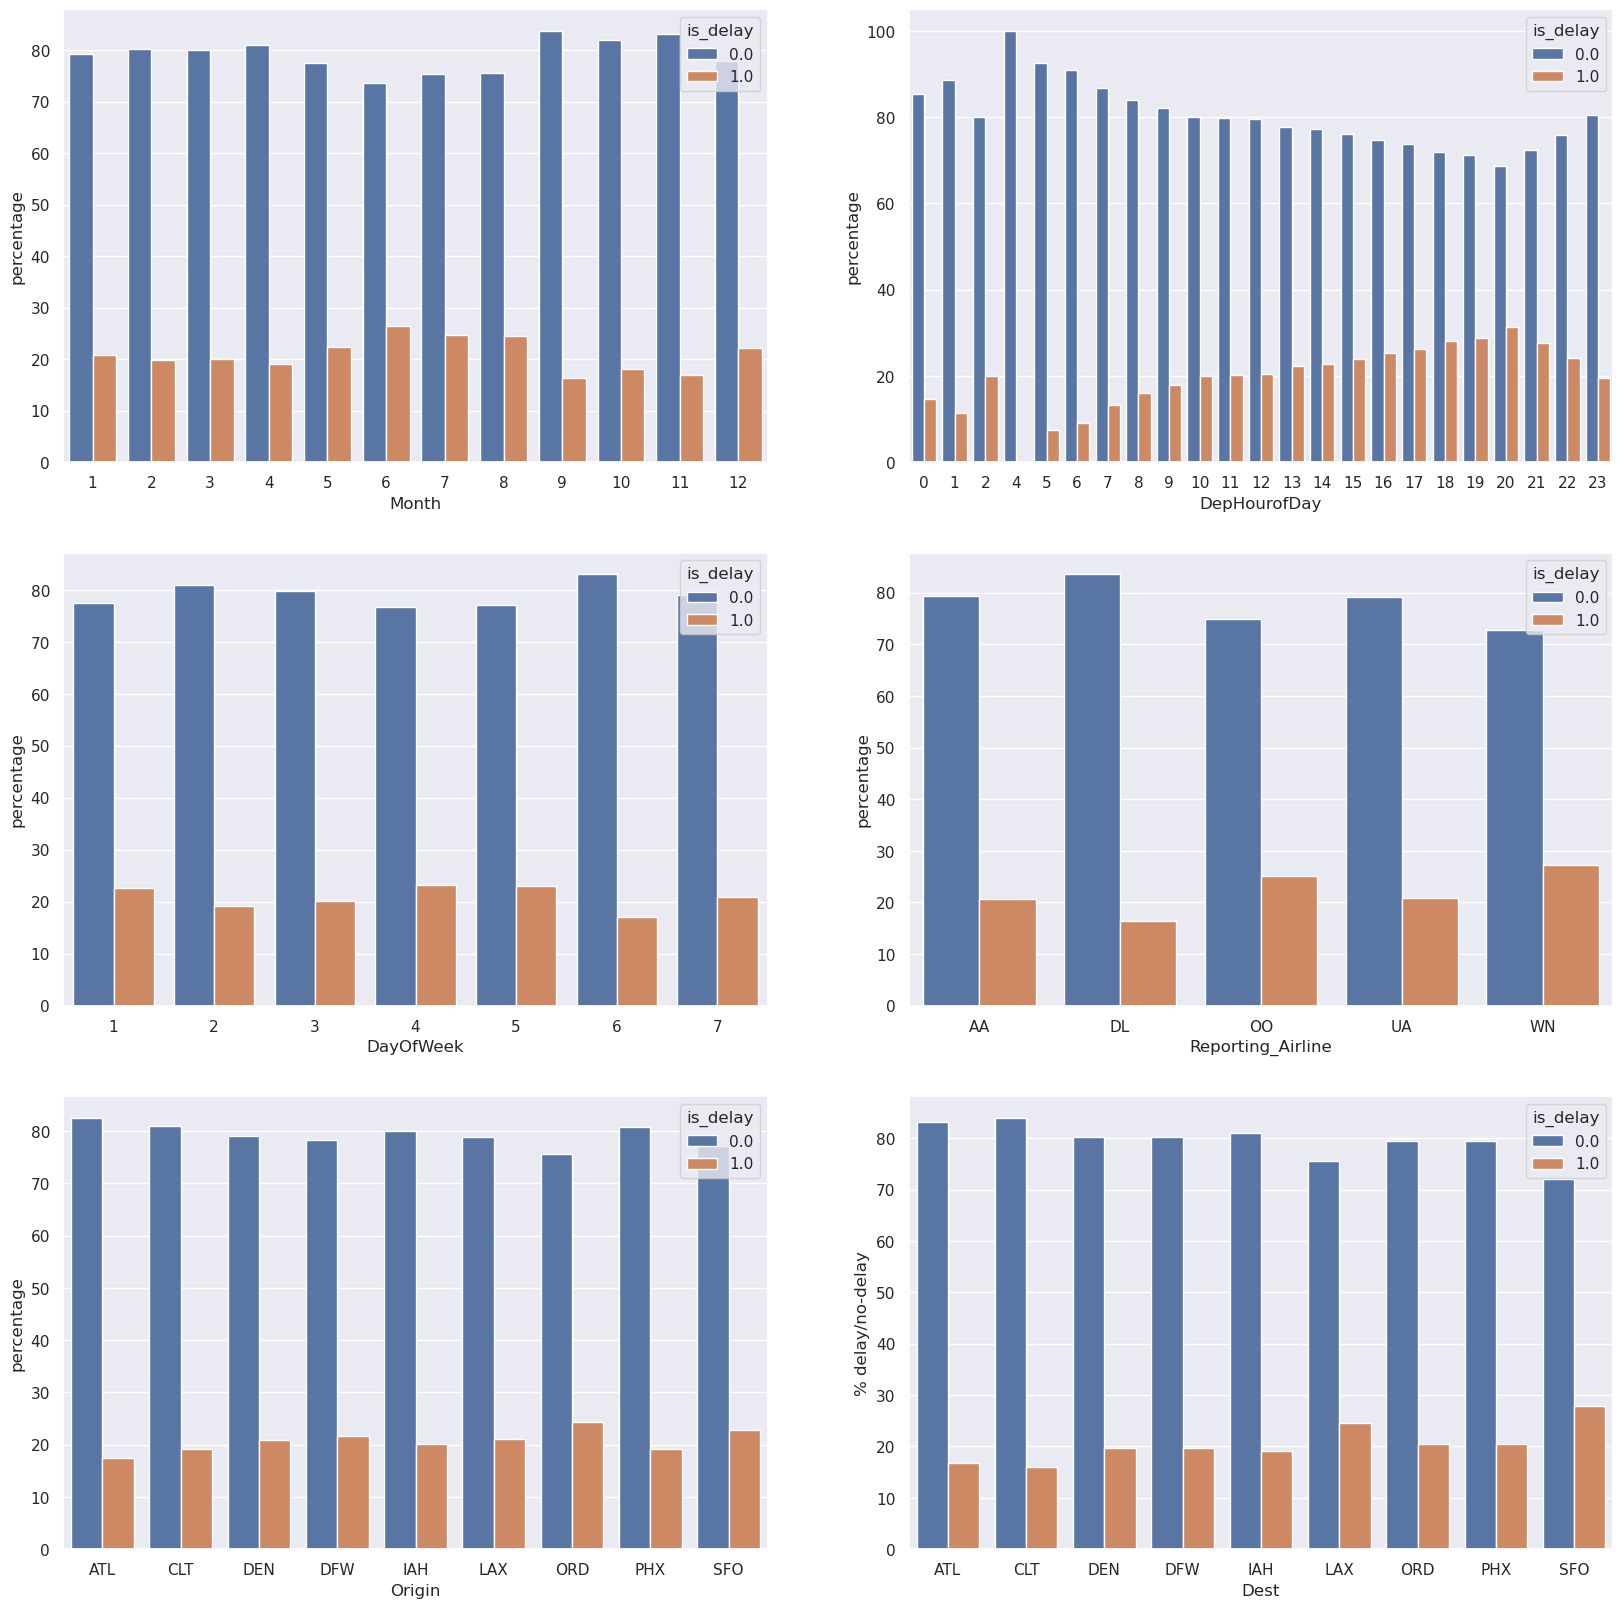

In [62]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

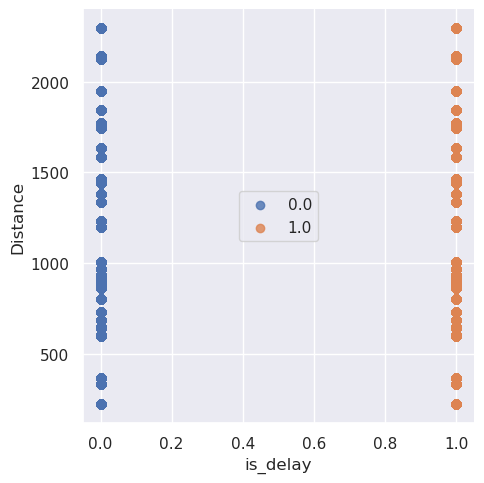

In [63]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

In [64]:
# Calculate % of delayed flights per month
month_delays = data.groupby('Month')['is_delay'].mean().sort_values(ascending=False)
print("Months with most delays (%):\n", month_delays)


Months with most delays (%):
 Month
6     0.264661
7     0.247089
8     0.245183
5     0.224078
12    0.221697
1     0.208029
3     0.199670
2     0.198064
4     0.190845
10    0.180276
11    0.169553
9     0.162533
Name: is_delay, dtype: float64


In [65]:
# Assuming column is 'DepHourofDay'
hour_delays = data.groupby('DepHourofDay')['is_delay'].mean().sort_values(ascending=False)
print("Hours with most delays (%):\n", hour_delays)


Hours with most delays (%):
 DepHourofDay
20    0.312697
19    0.287315
18    0.280146
21    0.276457
17    0.261350
16    0.253165
22    0.242172
15    0.239903
14    0.228016
13    0.222774
12    0.204295
11    0.202204
2     0.200000
10    0.199197
23    0.194662
9     0.179028
8     0.159866
0     0.145629
7     0.132539
1     0.114722
6     0.089734
5     0.074196
4     0.000000
Name: is_delay, dtype: float64


In [66]:
day_delays = data.groupby('DayOfWeek')['is_delay'].mean().sort_values(ascending=False)
print("Days of week with most delays (%):\n", day_delays)


Days of week with most delays (%):
 DayOfWeek
4    0.232265
5    0.229923
1    0.226099
7    0.209648
3    0.201837
2    0.191176
6    0.170358
Name: is_delay, dtype: float64


In [67]:
airline_delays = data.groupby('Reporting_Airline')['is_delay'].mean().sort_values(ascending=False)
print("Airlines with most delays (%):\n", airline_delays)


Airlines with most delays (%):
 Reporting_Airline
WN    0.272031
OO    0.250688
UA    0.208257
AA    0.206163
DL    0.164691
Name: is_delay, dtype: float64


In [68]:
origin_delays = data.groupby('Origin')['is_delay'].mean().sort_values(ascending=False)
dest_delays = data.groupby('Dest')['is_delay'].mean().sort_values(ascending=False)

print("Origin airports with most delays (%):\n", origin_delays.head(10))
print("Destination airports with most delays (%):\n", dest_delays.head(10))


Origin airports with most delays (%):
 Origin
ORD    0.243718
SFO    0.228449
DFW    0.217068
LAX    0.211328
DEN    0.208926
IAH    0.200685
PHX    0.192697
CLT    0.191084
ATL    0.174920
Name: is_delay, dtype: float64
Destination airports with most delays (%):
 Dest
SFO    0.279400
LAX    0.245074
PHX    0.205071
ORD    0.204910
DFW    0.196876
DEN    0.196745
IAH    0.190405
ATL    0.167626
CLT    0.160385
Name: is_delay, dtype: float64


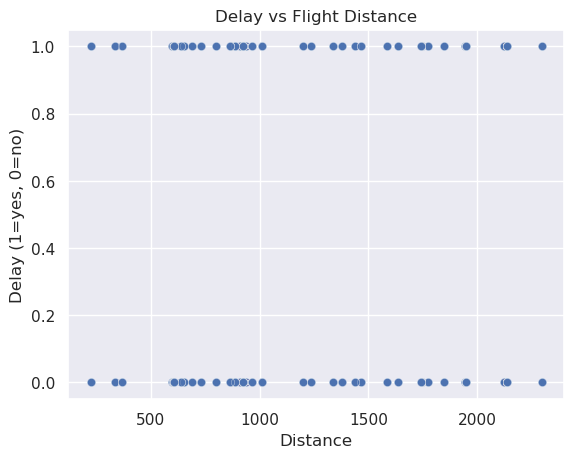

Correlation between flight distance and delays: -0.012


In [69]:
# Assuming the column is 'Distance'
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Distance', y='is_delay', data=data, alpha=0.2)
plt.ylabel('Delay (1=yes, 0=no)')
plt.title('Delay vs Flight Distance')
plt.show()

# Also compute correlation
corr = data['Distance'].corr(data['is_delay'])
print(f"Correlation between flight distance and delays: {corr:.3f}")


In [70]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay'],
      dtype='object')

In [71]:
data.dtypes

Year                          int64
Quarter                       int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
FlightDate           datetime64[ns]
Reporting_Airline            object
Origin                       object
OriginState                  object
Dest                         object
DestState                    object
CRSDepTime                    int64
ArrDelay                    float64
ArrDelayMinutes             float64
is_delay                    float64
Cancelled                   float64
Diverted                    float64
AirTime                     float64
Distance                    float64
DistanceGroup                 int64
DepHourofDay                  int64
dtype: object

In [72]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [74]:
# Assuming categorical_columns is a list of categorical column names
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data_dummies = data_dummies.replace({True: 1, False: 0})


In [75]:
data.columns

Index(['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay'],
      dtype='object')

In [76]:
data.shape

(1635590, 10)